# Import required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D


%matplotlib inline

# Loading Data

In [2]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train_data.shape

(42000, 785)

# Unique Labels & their counts

<Axes: xlabel='label', ylabel='count'>

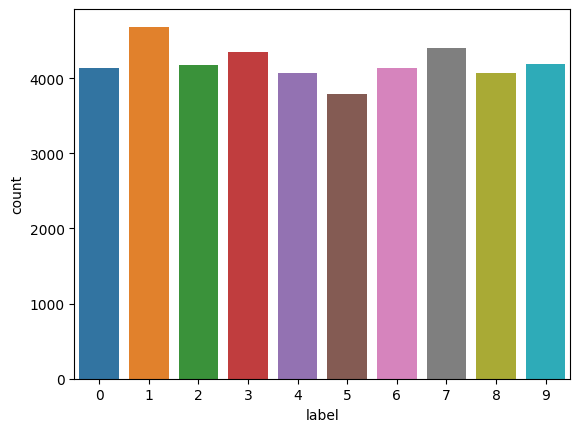

In [3]:
plt.figure()
sns.countplot(x=train_data.label)

In [4]:
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_data.shape

(28000, 784)

# Separate features and labels

In [5]:
X = train_data.iloc[:, 1:].values.astype('float32') / 255.0 #Scale The Data
y = train_data.iloc[:, 0].values.astype('int32')

# Sample images from train data

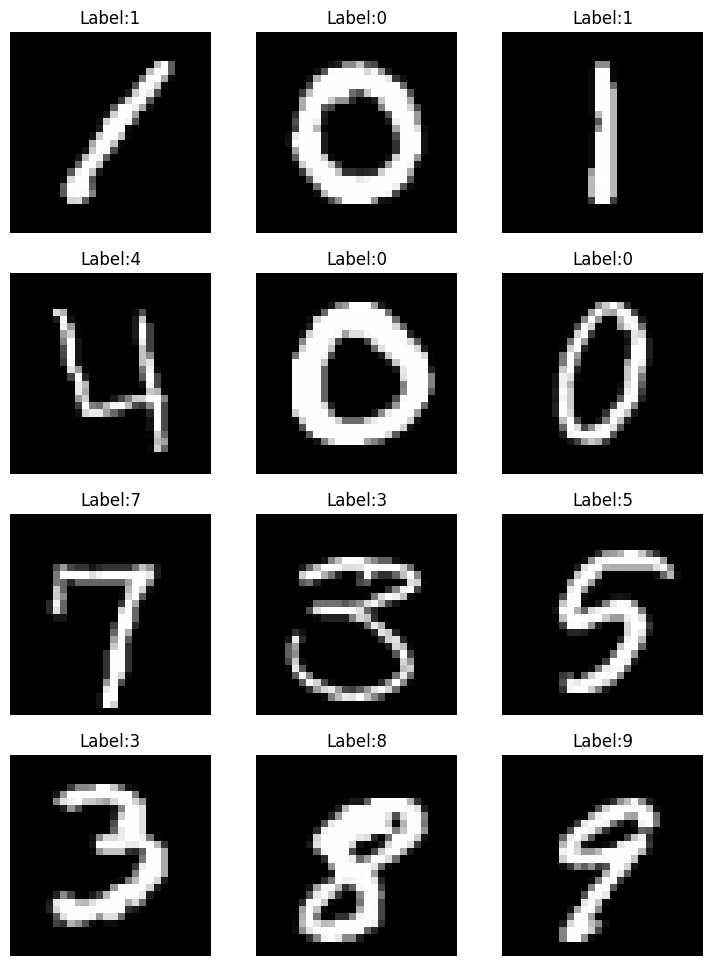

In [6]:
plt.figure(figsize=(9,12))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.title(f"Label:{y[i]}")
    plt.axis("off")

# Split the data into training and validation sets

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


# Reshape the data and convert labels to categorical

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Create the CNN model

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

# Compile the model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [11]:
history=model.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


2023-10-01 06:05:38.680566: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


132/132 [==============================] - 7s 18ms/step - loss: 0.4383 - accuracy: 0.8635 - val_loss: 0.1112 - val_accuracy: 0.9671
Epoch 2/10
132/132 [==============================] - 2s 14ms/step - loss: 0.1307 - accuracy: 0.9604 - val_loss: 0.0679 - val_accuracy: 0.9794
Epoch 3/10
132/132 [==============================] - 2s 14ms/step - loss: 0.0913 - accuracy: 0.9731 - val_loss: 0.0541 - val_accuracy: 0.9831
Epoch 4/10
132/132 [==============================] - 2s 14ms/step - loss: 0.0716 - accuracy: 0.9784 - val_loss: 0.0475 - val_accuracy: 0.9852
Epoch 5/10
132/132 [==============================] - 2s 14ms/step - loss: 0.0621 - accuracy: 0.9808 - val_loss: 0.0405 - val_accuracy: 0.9869
Epoch 6/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.0389 - val_accuracy: 0.9877
Epoch 7/10
132/132 [==============================] - 2s 13ms/step - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.0355 - val_accuracy: 0.9893
Epoch 8/10

Best Validation Loss: 0.0355
Best Validation Accuracy: 0.9908


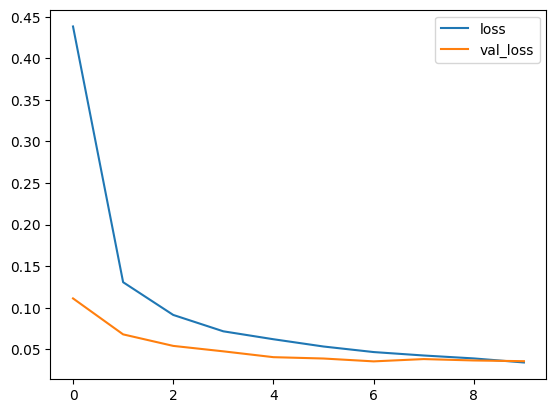

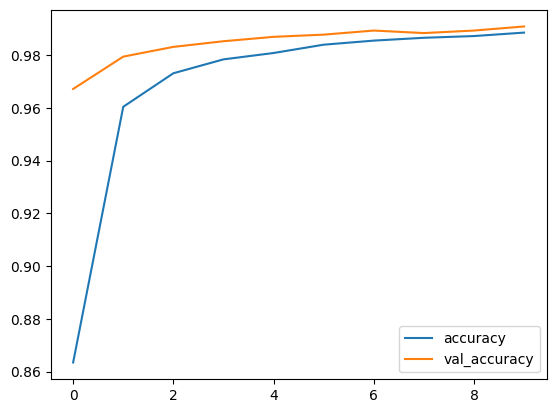

In [12]:
history_df = pd.DataFrame(history.history)

history_df.loc[:,['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

# Preprocess the test data

In [13]:
X_test = test_data.values.astype('float32') / 255.0 #Scale The Data
X_test = X_test.reshape(-1, 28, 28, 1)

# Make predictions on the test data


In [14]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

875/875 [==============================] - 2s 2ms/step


Text(0.5, 1.0, 'Digit : 2')

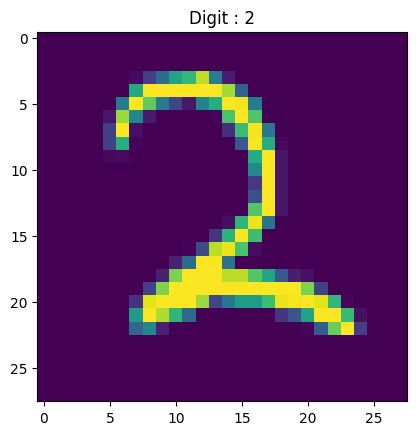

In [15]:
test_shape = np.shape(test_data)
img_size = (28,28,1)

n = np.random.randint(0,test_shape[0]) # Generating Random Number
sample = test_data.iloc[n,:]
sample = np.array(sample)
sample = np.reshape(sample,img_size)

plt.imshow(sample)
plt.title('Digit : ' + str(predicted_labels[n]))

# Model Evaluations on Train and Valdition data

In [16]:
loss , acc = model.evaluate(X_train, y_train)
print("Loss on Train Data:", loss)
print("Accuracy on Train data:",acc)

loss , acc = model.evaluate(X_val,y_val)
print("Loss on Validation Data:", loss)
print("Accuracy on Validation data:",acc)

1050/1050 [==============================] - 3s 3ms/step - loss: 0.0072 - accuracy: 0.9980
Loss on Train Data: 0.007212407886981964
Accuracy on Train data: 0.9979761838912964
263/263 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9908
Loss on Validation Data: 0.035683177411556244
Accuracy on Validation data: 0.9908333420753479


# Save the predictions to a file

In [17]:
Submit_Predictions = []

for i in range(len(predictions)):
    Submit_Predictions.append([i+1,predictions[i]])
    
Submit_Predictions = pd.DataFrame(Submit_Predictions, columns = ['ImageId','Label'], index = None)
Submit_Predictions = Submit_Predictions.set_index('ImageId')
Submit_Predictions.head()

Submit_Predictions.to_csv('/kaggle/working/Submit_Predictions.csv')
print('Predictions saved to Submit_Predictions.csv')

Predictions saved to Submit_Predictions.csv
